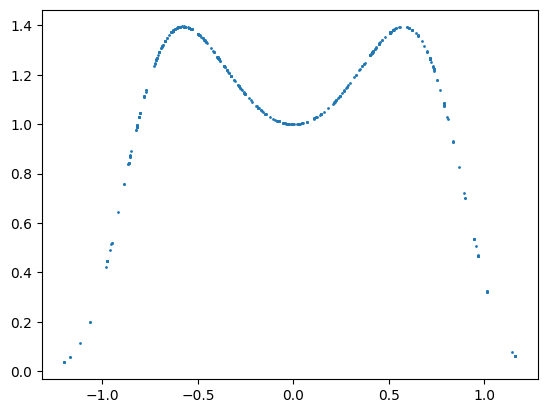

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import sys
import torch # na razie tylko metropolis

xs = np.random.random(size=(100,))
ys = stats.norm.pdf(xs, loc=0, scale=1) # rozkład normalny ciekawe czy zagdniemy? 

# metropolis hastings, chcemy dostać te stałe rozkładu normalnego
def moj_rozklad(x):
    return np.exp(-(3 * x**4 - 2 * x**2))

numbers = 500
x_actual = 0.0 # doesn't matter
xs = np.zeros(numbers)
ys = np.zeros(numbers)
added = 0

while added < numbers:
    x_proposed = x_actual + np.random.normal(loc=0, scale=1) # losową wartość do x-a dodajemy - no teraz zaczyna ta metoda mieć sens
    ys[added] = moj_rozklad(x_proposed)
    prob_adding = ys[added] / moj_rozklad(x_actual) # te rozklady nie zaleza od poprzedniego punkut

    if np.random.uniform(low=0., high=1.) <= prob_adding:
        x_actual = x_proposed
    else:
        ys[added] = ys[added-1]
    xs[added] = x_actual
    added += 1

plt.scatter(xs, ys, s=1)
plt.show()